In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import time

In [2]:
exe_dir = "/home/aswathy/DATA_ANALYSIS/datalab/code"
data_dir = "/home/aswathy/DATA_ANALYSIS/datalab/solutions/Exercise_3"

In [3]:
"""
Usage: ./generate_source  [-h] [-o <file>] [-s <float>] [-d <float>] [-N <int>] [-f <float>] [-p <float>]
                          [-a <float>] [-r <int>]
  -o, --output=<file>       output file
  -s, --sigma=<float>       standard deviation sigma
  -d, --deltaT=<float>      delta T betwean measurements
  -N, --length=<int>        number of elements
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -a, --amplitude=<float>   signal amplitude
  -r, --random=<int>        if set to 1, generate random signal
  -h, --help                print this help and exit
"""      

def generate_source(outputFile=None, sigma=0, f=0, A=0, delta_T=None, N=10000, phi=0, r=0):
    if delta_T == None : 
        delta_T = 1/N
       
    dataPath = os.path.join(data_dir, outputFile)
    exe_path = os.path.join(exe_dir, 'generate_source')
    cmd_str = f"{exe_path} -o {dataPath} -s {sigma} -d {delta_T} -N {N} -f {f} -p {phi} -a {A} -r {r}"
    
    #print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())

    return

SyntaxError: invalid syntax (<ipython-input-3-8bf52f6ce0d7>, line 21)

In [4]:
"""
Usage: ./prober  [-h] [-i <file>] [-o <file>] [-f <float>] [-p <float>] [-t <file>] [-m <int>]
  -i, --input=<file>        input file
  -o, --output=<file>       output file
  -f, --freq=<float>        frequency
  -p, --phase=<float>       phase
  -h, --help                print this help and exit
  -t, --templatebank=<file> template bank file
  -m, --method=<int>        select method to analyze signal 1, 2 or 3
"""

def prober(inputFile, f=0, outputFile=None, phi=0, template=None, mod=0):
    
    exe_path = os.path.join(exe_dir, 'prober')
    cmd_str = f"{exe_path} -i {data_dir}/{inputFile} -o {data_dir}/{outputFile} -m {mod}"
    if template:
        cmd_str += f" -t {data_dir}/{template} "
    else:
        cmd_str += f" -f {f} -p {phi}"
        
    #print(cmd_str)
        
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    #if out:
        #print('The process has an output:', out.decode())
        
    if out:
        if template:
            print('The process has an output:', out.decode())
        else:
            with open(f"{data_dir}/output_S{mod}.txt", "w") as file:
                print('The process has an output:', out.decode())
                file.write(out.decode())
                #return f"output_S{mod}.txt"
    if mod == 3:
        if template:
            print(cmd_str)
        else:
            data = np.loadtxt(f"{data_dir}/{outputFile}")
            with open(f"{data_dir}/output_S{mod}.txt", "w") as file:
                file.write("{0: .1f}".format(data[f][0]) + " {0:.1f}".format(data[f][1]) + " {0:.1f}".format(data[f][2]))
                #file.write("{0}\n".format(data[f]))
                #return f"output_S{mod}.txt"
    
    return f"output_S{mod}.txt"

SyntaxError: invalid syntax (<ipython-input-4-3b10a3671fcf>, line 15)

In [44]:
"""
data_set = {
    1: {
        'sigma': 0.0,
        'A': 1,
        'f': 30,
        'delta_T': 0.0001,
        'filename': "data_01.csv",
        'title': "-s 0 -a 1",
    },
    2: {
        'sigma': 0.5,
        'A': 1,
        'f': 30,
        'delta_T': 0.0001,
        'filename': "data_02.csv",
        'title': "-s 0.5 -a 1",
    },
    3: {
        'sigma': 5,
        'A': 1,
        'f': 30,
        'delta_T': 0.0001,
        'filename': "data_03.csv",
        'title': "-s 5 -a 1",
    },
    4: {
        'sigma': 10,
        'A': 1,
        'f': 30,
        'delta_T': 0.0001,
        'filename': "data_04.csv",
        'title': "-s 10 -a 1",
    },
    5 : {
        'sigma': 10,
        'A': 0,
        'f': 30,
        'delta_T': 0.0001,
        'filename': "data_05.csv",
        'title': "-s 10 -a 0",
    }
}

for key, value in data_set.items():
    generate_source(value.get('filename'), sigma=value.get('sigma'), A=value.get('A'), f=value.get('f'), delta_T=value.get('delta_T'))
"""
    

In [5]:
#Define a function to calculate the Mismatch
def mismatch(iFile, resultsFile, mode, freq=0, p=0, nfrq=0, nphi=0):
    #Create a template bank
    if nphi == 0:
        frq = np.linspace(0.01, 100.0, nfrq)
        with open(f"{data_dir}/temp_bank_{nfrq}.csv", "w") as file:
            for i in range(nfrq):
                file.write("{0} {1}\n".format(frq[i],0))
        tbank = f"temp_bank_{nfrq}.csv"
    else:
        frq = np.linspace(0.01, 100.0, nfrq)
        ph = np.linspace(0, 2*np.pi, nphi)
        with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
            for i in range(nfrq):
                for j in range(nphi):
                    file.write("{0} {1}\n".format(frq[i], ph[j]))
        tbank = f"temp_bank_{nfrq}_{nphi}.csv"
    
    
    OFile_1 = prober(inputFile=iFile, f=freq, outputFile=resultsFile, phi=p, mod=mode)
    prober(inputFile=iFile, outputFile=resultsFile, template=tbank, mod=mode)
    
        
    if mode == 2:
        data1 = np.loadtxt(os.path.join(data_dir, OFile_1))
        s_true = data1[2]
        print("Minimum Value at f: ",s_true)
        data2 = np.loadtxt(os.path.join(data_dir, resultsFile))
        s = np.where(data2[:,2] == np.min(data2[:,2]))
        s_best = data2[:,2][s][0]
        print("Minimum value at best f: ",s_best)
        M = 1 - abs(float(s_true)-float(s_best)/float(s_true))
    else:
        data1 = np.loadtxt(os.path.join(data_dir, OFile_1))
        s_true = data1[2]
        print("Maximum Value at f : ",s_true)
        data2 = np.loadtxt(os.path.join(data_dir, resultsFile))
        s = np.where(data2[:,2] == np.max(data2[:,2]))
        s_best = data2[:,2][s][0]
        print("Maximum value at best f: ",s_best)
        M = 1 - float(s_best)/float(s_true)
    
    print("Mismatch: ",M)
    print("\n")
    
    #if nphi == 0:
        #return f"{freq} {M}"
    #else:
        #return f"{freq} {p} {M}"
        
    return M

In [45]:
data_files = []
nf = 100
frq = np.linspace(0.5, 100.0, nf)
for n in range(nf):
    data_files.append(generate_source(f"data_0{n}.csv",sigma=5, A=1, f=frq[n]))
with open(f"{data_dir}/true_freq.csv", "w") as file:
    for i in range(nf):
        file.write("{0}\n".format(frq[i]))


# a = 1, s = 0, f = 30, p = 0
values = []
for n in range(nf):
    values.append(mismatch(f"data_0{n}.csv", resultsFile=f"results_1_S1.csv", mode=1, freq=frq[n], p=0, nfrq=300, nphi=0))
#os.system(f"echo '{data}' >> {data_dir}/values_S1.csv")


The process has an output: 0.5 0 0.556535

Maximum Value at f :  0.556535
Maximum value at best f:  0.592851
Mismatch:  -0.06525375762530672


The process has an output: 1.50505 0 0.418601

Maximum Value at f :  0.418601
Maximum value at best f:  0.356237
Mismatch:  0.1489819661204822


The process has an output: 2.5101 0 0.496276

Maximum Value at f :  0.496276
Maximum value at best f:  0.464193
Mismatch:  0.06464749453932883


The process has an output: 3.51515 0 0.509634

Maximum Value at f :  0.509634
Maximum value at best f:  0.46031
Mismatch:  0.09678318165585509


The process has an output: 4.5202 0 0.555089

Maximum Value at f :  0.555089
Maximum value at best f:  0.465876
Mismatch:  0.16071837128820787


The process has an output: 5.52525 0 0.510206

Maximum Value at f :  0.510206
Maximum value at best f:  0.464725
Mismatch:  0.08914242482448276


The process has an output: 6.5303 0 0.549262

Maximum Value at f :  0.549262
Maximum value at best f:  0.471999
Mismatch:  0.140666

Maximum Value at f :  0.503884
Maximum value at best f:  0.489474
Mismatch:  0.02859785188654529


The process has an output: 58.7929 0 0.459886

Maximum Value at f :  0.459886
Maximum value at best f:  0.440197
Mismatch:  0.042812784037783325


The process has an output: 59.798 0 0.436675

Maximum Value at f :  0.436675
Maximum value at best f:  0.433218
Mismatch:  0.00791664281216009


The process has an output: 60.803 0 0.489047

Maximum Value at f :  0.489047
Maximum value at best f:  0.473956
Mismatch:  0.030857974795878595


The process has an output: 61.8081 0 0.430497

Maximum Value at f :  0.430497
Maximum value at best f:  0.414596
Mismatch:  0.03693637818614304


The process has an output: 62.8131 0 0.488492

Maximum Value at f :  0.488492
Maximum value at best f:  0.474745
Mismatch:  0.02814170958787454


The process has an output: 63.8182 0 0.509904

Maximum Value at f :  0.509904
Maximum value at best f:  0.505103
Mismatch:  0.009415497819197483


The process has an outpu

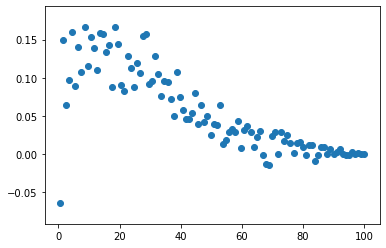

In [47]:
#print(values)
#data_values = np.loadtxt(f"{data_dir}/values_S1.csv")
plt.scatter(frq,values)
#plt.xlabel("nfrq")
#plt.ylabel("mismatch")

In [23]:
"""
generate_source(f"data_06.csv", sigma=5, A=0, f=30)
generate_source(f"data_07.csv", sigma=5, A=1, f=30)
prober(f"data_06.csv", f=30, outputFile="results_6_S1", phi=0, mod=1)
prober(f"data_07.csv", f=30, outputFile="results_7_S1", phi=0, mod=1)
"""
generate_source(f"data_06.csv", sigma=5, N=1000)
generate_source(f"data_07.csv", sigma=5, A=1, f=30, N=1000)
prober(f"data_06.csv", f=30, outputFile="results_6_S1", phi=0, mod=1)
prober(f"data_07.csv", f=30, outputFile="results_7_S1", phi=0, mod=1)

The process has an output: 30 0 0.0297192

The process has an output: 30 0 0.53022



'output_S1.txt'

In [67]:
#n = 1000
#freq = np.linspace(0.01, 100.0, n)
#with open(f"{data_dir}/temp_bank.csv", "w") as file:
    #for i in range(n):
        #file.write("{0} {1}\n".format(freq[i],0))

#prober(f"data_06.csv", f=30, outputFile="results_06_S1.csv", template="temp_bank.csv", mod=1)
#prober(f"data_07.csv", f=30, outputFile="results_07_S1.csv", template="temp_bank.csv", mod=1)

#mismatch(f"data_06.csv", resultsFile=f"results_06_S1.csv", mode=1, freq=30, p=0, nfrq=2000, nphi=0)
#mismatch(f"data_07.csv", resultsFile=f"results_07_S1.csv", mode=1, freq=30, p=0, nfrq=2000, nphi=0)

In [24]:
data2 = np.loadtxt(f"{data_dir}/results_06_S1.csv")
data2 = data2[:,2]
data3 = np.loadtxt(f"{data_dir}/results_07_S1.csv")
data3 = data3[:,2]
#plt.hist([data2,data3],bins='auto', label=['noise','signal+noise'])
#plt.legend(loc='upper right')

(array([  3.,   3.,   3.,   3.,   3.,   1.,   5.,   3.,   2.,  11.,  15.,
         18.,  18.,  25.,  41.,  42.,  53.,  44.,  47.,  57.,  66.,  62.,
         96.,  85.,  88.,  88.,  83.,  97.,  94., 100.,  85.,  93.,  79.,
         61.,  62.,  62.,  60.,  35.,  38.,  35.,  37.,  15.,  19.,  14.,
          8.,  13.,   9.,  10.,   5.,   4.]),
 array([-0.120617 , -0.1162044, -0.1117918, -0.1073792, -0.1029666,
        -0.098554 , -0.0941414, -0.0897288, -0.0853162, -0.0809036,
        -0.076491 , -0.0720784, -0.0676658, -0.0632532, -0.0588406,
        -0.054428 , -0.0500154, -0.0456028, -0.0411902, -0.0367776,
        -0.032365 , -0.0279524, -0.0235398, -0.0191272, -0.0147146,
        -0.010302 , -0.0058894, -0.0014768,  0.0029358,  0.0073484,
         0.011761 ,  0.0161736,  0.0205862,  0.0249988,  0.0294114,
         0.033824 ,  0.0382366,  0.0426492,  0.0470618,  0.0514744,
         0.055887 ,  0.0602996,  0.0647122,  0.0691248,  0.0735374,
         0.07795  ,  0.0823626,  0.0867752,  0

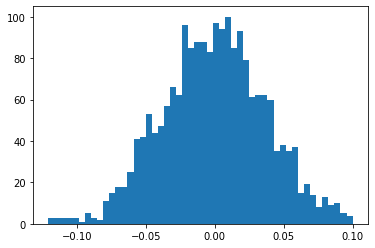

In [25]:
plt.hist(data2, bins=50)

(array([  3.,  12.,  15.,  45.,  60.,  72., 157., 173., 258., 273., 305.,
        247., 133., 108.,  78.,  23.,  14.,   7.,   0.,   1.,   1.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          2.,   0.,   0.,   2.,   0.,   3.]),
 array([-0.130447 , -0.1167258, -0.1030046, -0.0892834, -0.0755622,
        -0.061841 , -0.0481198, -0.0343986, -0.0206774, -0.0069562,
         0.006765 ,  0.0204862,  0.0342074,  0.0479286,  0.0616498,
         0.075371 ,  0.0890922,  0.1028134,  0.1165346,  0.1302558,
         0.143977 ,  0.1576982,  0.1714194,  0.1851406,  0.1988618,
         0.212583 ,  0.2263042,  0.2400254,  0.2537466,  0.2674678,
         0.281189 ,  0.2949102,  0.3086314,  0.3223526,  0.3360738,
         0.349795 ,  0.3635162,  0.3772374,  0.3909586,  0.4046798,
         0.418401 ,  0.4321222,  0.4458434,  0.4595646,  0.4732858,
         0.487007 ,  0.5007282,  0.5144494,  0

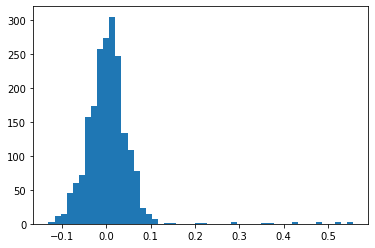

In [26]:
#plt.figure(figsize=(10,6))
plt.hist(data3, bins=50)

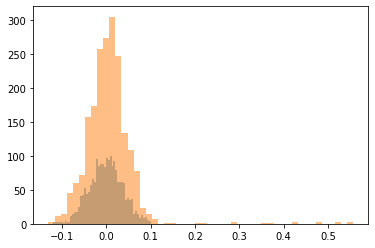

In [27]:
plt.hist(data2, bins=50, alpha=0.5)
plt.hist(data3, bins=50, alpha=0.5)
plt.show()

In [6]:
results_n_10 = np.zeros(200)
results_s_10 = np.zeros(200)

#n = 1000
#freq = np.linspace(25, 35, n)
#with open(f"{data_dir}/hist_tbank.csv", "w") as file:
    #for i in range(n):
        #file.write("{0} {1}\n".format(freq[i],0))

for i in range(200):
    generate_source(f"noise_{i}.csv", sigma=10, N=1000)
    File1 = prober(f"noise_{i}.csv", f=30, outputFile=f"results_noise_{i}_S1.csv", phi=0, mod=1)
    data4 = np.loadtxt(os.path.join(data_dir, File1))
    results_n_10[i] = data4[2]    
    generate_source(f"signal_{i}.csv", sigma=10, A=2, f=30, N=1000)
    File2 = prober(f"signal_{i}.csv", f=30, outputFile=f"results_signal_{i}_S1.csv", phi=0, mod=1)
    data5 = np.loadtxt(os.path.join(data_dir, File2))
    results_s_10[i] = data5[2]

The process has an output: 30 0 0.161202

The process has an output: 30 0 1.12846

The process has an output: 30 0 -0.148193

The process has an output: 30 0 0.728599

The process has an output: 30 0 0.00184489

The process has an output: 30 0 1.24036

The process has an output: 30 0 -0.230574

The process has an output: 30 0 1.1217

The process has an output: 30 0 -0.320922

The process has an output: 30 0 0.644731

The process has an output: 30 0 -0.0871982

The process has an output: 30 0 1.26299

The process has an output: 30 0 -0.25113

The process has an output: 30 0 0.707385

The process has an output: 30 0 -0.267482

The process has an output: 30 0 1.11939

The process has an output: 30 0 -0.265492

The process has an output: 30 0 1.0659

The process has an output: 30 0 0.0466997

The process has an output: 30 0 0.522634

The process has an output: 30 0 -0.258629

The process has an output: 30 0 0.695787

The process has an output: 30 0 0.0708727

The process has an output: 30 

The process has an output: 30 0 0.105685

The process has an output: 30 0 0.665739

The process has an output: 30 0 -0.391309

The process has an output: 30 0 1.32449

The process has an output: 30 0 -0.0865469

The process has an output: 30 0 0.680901

The process has an output: 30 0 -0.0570708

The process has an output: 30 0 0.771858

The process has an output: 30 0 0.204147

The process has an output: 30 0 0.881633

The process has an output: 30 0 0.352623

The process has an output: 30 0 0.715083

The process has an output: 30 0 0.22296

The process has an output: 30 0 0.99057

The process has an output: 30 0 0.290383

The process has an output: 30 0 1.15478

The process has an output: 30 0 0.00830517

The process has an output: 30 0 0.871607

The process has an output: 30 0 0.201576

The process has an output: 30 0 0.570897

The process has an output: 30 0 -0.143873

The process has an output: 30 0 0.996961

The process has an output: 30 0 -0.176673

The process has an output: 30

The process has an output: 30 0 0.0570529

The process has an output: 30 0 0.882487



(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,  1.,
         3.,  2.,  1.,  2.,  5.,  9.,  3.,  5.,  8.,  4.,  7., 16.,  6.,
         7., 13., 12.,  9.,  7.,  6.,  7., 10.,  4.,  7.,  6.,  4.,  5.,
         7.,  6.,  2.,  1.,  1.,  2.,  2.,  1.,  1.,  0.,  3.]),
 array([-0.779608  , -0.75359064, -0.72757328, -0.70155592, -0.67553856,
        -0.6495212 , -0.62350384, -0.59748648, -0.57146912, -0.54545176,
        -0.5194344 , -0.49341704, -0.46739968, -0.44138232, -0.41536496,
        -0.3893476 , -0.36333024, -0.33731288, -0.31129552, -0.28527816,
        -0.2592608 , -0.23324344, -0.20722608, -0.18120872, -0.15519136,
        -0.129174  , -0.10315664, -0.07713928, -0.05112192, -0.02510456,
         0.0009128 ,  0.02693016,  0.05294752,  0.07896488,  0.10498224,
         0.1309996 ,  0.15701696,  0.18303432,  0.20905168,  0.23506904,
         0.2610864 ,  0.28710376,  0.31312112,  0.33913848,  0.36515584,
         0.3911732 ,  0.41719056,  0.44320792,  0.46922528,

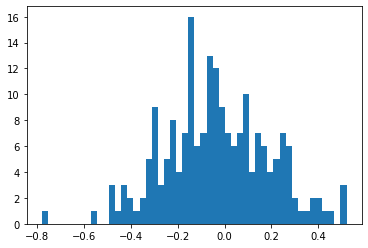

In [101]:
plt.hist(results_n_10, bins=50)

(array([ 2.,  1.,  1.,  0.,  2.,  0.,  2.,  1.,  4.,  4.,  8.,  3.,  1.,
         2.,  5.,  8.,  5.,  6.,  7.,  8.,  8., 10.,  8.,  7.,  6., 11.,
         9.,  5., 10., 10.,  4.,  5.,  2.,  3.,  6.,  4.,  4.,  2.,  1.,
         3.,  2.,  0.,  1.,  2.,  4.,  0.,  0.,  2.,  0.,  1.]),
 array([0.444299  , 0.46758362, 0.49086824, 0.51415286, 0.53743748,
        0.5607221 , 0.58400672, 0.60729134, 0.63057596, 0.65386058,
        0.6771452 , 0.70042982, 0.72371444, 0.74699906, 0.77028368,
        0.7935683 , 0.81685292, 0.84013754, 0.86342216, 0.88670678,
        0.9099914 , 0.93327602, 0.95656064, 0.97984526, 1.00312988,
        1.0264145 , 1.04969912, 1.07298374, 1.09626836, 1.11955298,
        1.1428376 , 1.16612222, 1.18940684, 1.21269146, 1.23597608,
        1.2592607 , 1.28254532, 1.30582994, 1.32911456, 1.35239918,
        1.3756838 , 1.39896842, 1.42225304, 1.44553766, 1.46882228,
        1.4921069 , 1.51539152, 1.53867614, 1.56196076, 1.58524538,
        1.60853   ]),
 <a list of 50

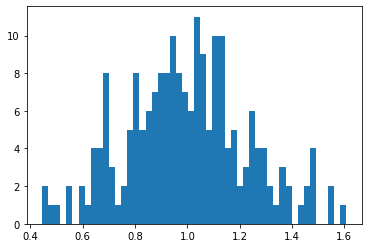

In [102]:
plt.hist(results_s_10, bins=50)

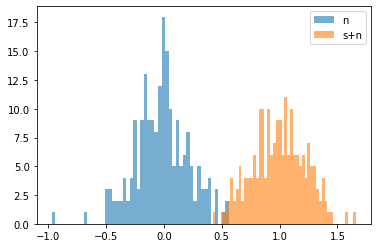

In [8]:
plt.hist(results_n_10, bins=50, alpha=0.6, label="n")
plt.hist(results_s_10, bins=50, alpha=0.6, label = "s+n")
plt.legend()
plt.show()
plt.close()

In [7]:
results_n_20 = np.zeros(200)
results_s_20 = np.zeros(200)

#n = 1000
#freq = np.linspace(25, 35, n)
#with open(f"{data_dir}/hist_tbank.csv", "w") as file:
    #for i in range(n):
        #file.write("{0} {1}\n".format(freq[i],0))

for i in range(200):
    generate_source(f"noise_{i}.csv", sigma=20, N=1000)
    File3 = prober(f"noise_{i}.csv", f=30, outputFile=f"results_noise_{i}_S1.csv", phi=0, mod=1)
    data6 = np.loadtxt(os.path.join(data_dir, File3))
    results_n_20[i] = data6[2]    
    generate_source(f"signal_{i}.csv", sigma=20, A=2, f=30, N=1000)
    File4 = prober(f"signal_{i}.csv", f=30, outputFile=f"results_signal_{i}_S1.csv", phi=0, mod=1)
    data7 = np.loadtxt(os.path.join(data_dir, File4))
    results_s_20[i] = data7[2] 

The process has an output: 30 0 -0.484146

The process has an output: 30 0 1.02321

The process has an output: 30 0 -0.0610188

The process has an output: 30 0 0.669266

The process has an output: 30 0 0.016666

The process has an output: 30 0 0.652965

The process has an output: 30 0 0.765004

The process has an output: 30 0 1.41366

The process has an output: 30 0 0.360902

The process has an output: 30 0 0.469193

The process has an output: 30 0 0.140226

The process has an output: 30 0 0.650666

The process has an output: 30 0 0.189012

The process has an output: 30 0 1.06425

The process has an output: 30 0 0.653989

The process has an output: 30 0 0.891107

The process has an output: 30 0 -0.560188

The process has an output: 30 0 0.80499

The process has an output: 30 0 -0.121792

The process has an output: 30 0 1.49989

The process has an output: 30 0 0.261026

The process has an output: 30 0 0.808561

The process has an output: 30 0 -0.103285

The process has an output: 30 0 0

The process has an output: 30 0 1.74908

The process has an output: 30 0 0.349957

The process has an output: 30 0 1.10128

The process has an output: 30 0 0.224128

The process has an output: 30 0 0.6416

The process has an output: 30 0 0.73014

The process has an output: 30 0 1.0776

The process has an output: 30 0 -0.614542

The process has an output: 30 0 0.780586

The process has an output: 30 0 -0.870371

The process has an output: 30 0 1.24029

The process has an output: 30 0 -0.0810524

The process has an output: 30 0 1.65668

The process has an output: 30 0 0.563746

The process has an output: 30 0 1.0304

The process has an output: 30 0 -0.509616

The process has an output: 30 0 1.03849

The process has an output: 30 0 0.643322

The process has an output: 30 0 -0.307318

The process has an output: 30 0 0.0654013

The process has an output: 30 0 1.34105

The process has an output: 30 0 0.121172

The process has an output: 30 0 0.995328

The process has an output: 30 0 0.103895

The process has an output: 30 0 0.262512

The process has an output: 30 0 1.09343

The process has an output: 30 0 0.314942

The process has an output: 30 0 0.418627

The process has an output: 30 0 0.223979

The process has an output: 30 0 1.40093



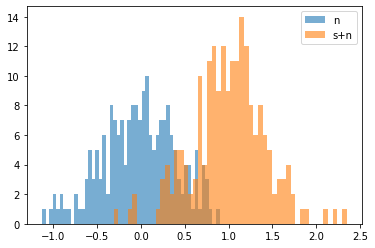

In [8]:
plt.hist(results_n_20, bins=50, alpha=0.6, label="n")
plt.hist(results_s_20, bins=50, alpha=0.6, label = "s+n")
plt.legend()
plt.show()
plt.close()

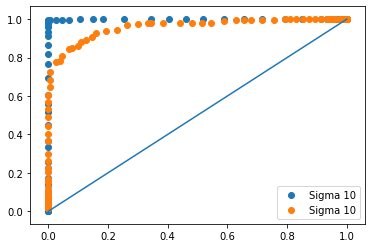

In [9]:
FP_10 = []
TP_10 = []
FP_20 = []
TP_20 = []

for t in np.linspace(-2,2,100):
    FP_10 = np.append(FP_10,len(np.where(results_n_10 >= t)[0])/len(results_n_10))
    TP_10 = np.append(TP_10,len(np.where(results_s_10 >= t)[0])/len(results_s_10))
    FP_20 = np.append(FP_20,len(np.where(results_n_20 >= t)[0])/len(results_n_20))
    TP_20 = np.append(TP_20,len(np.where(results_s_20 >= t)[0])/len(results_s_20))
    
plt.scatter(FP_10,TP_10,label="Sigma 10")
plt.scatter(FP_20,TP_20,label="Sigma 10")
plt.legend(loc="lower right")
plt.plot([0,1])
plt.show()
plt.close()

In [13]:
results_n_25 = np.zeros(100)
results_s_25 = np.zeros(100)

#n = 1000
#freq = np.linspace(25, 35, n)
#with open(f"{data_dir}/hist_tbank.csv", "w") as file:
    #for i in range(n):
        #file.write("{0} {1}\n".format(freq[i],0))
        
#nfrq = 500
#nphi = 50
#frq = np.linspace(0.01, 1000.0, nfrq)
#phi = np.linspace(0, 2*np.pi, nphi)
frq = 10
phi = 0

with open(f"{data_dir}/rand_tbank", "w") as file:
    file.write("{0} {1}\n".format(frq, phi))


"""
with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq[i], phi[j]))
"""


for i in range(100):
    generate_source(f"noise_{i}.csv", sigma=25, N=1000)
    File5 = prober(f"noise_{i}.csv", outputFile=f"results_noise_{i}_rand.csv", template=f"rand_tbank", mod=1)  
    data8 = np.loadtxt(os.path.join(data_dir, f"results_noise_{i}_rand.csv")) 
    results_n_25[i] = data8[2]
    generate_source(f"signal_{i}.csv", sigma=25, A=2, N=1000, r=1)
    prober(f"signal_{i}.csv", outputFile=f"results_signal_{i}_rand.csv", template=f"rand_tbank", mod=1)
    data9 = np.loadtxt(os.path.join(data_dir, f"results_signal_{i}_rand.csv"))
    results_s_25[i] = data9[2]

The process has an output: 118.829094
0.746072

The process has an output: 118.829094
0.746072

The process has an output: 118.829094
0.746072

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 479.210158
3.010639

The process has an output: 831.482634
5.224254

The process has an output: 831.482634
5.224254

The process has an output: 831.482634
5.

In [38]:
results_n_25 = []
results_s_25 = []

for i in range(100):
    print(i)
    data8 = np.loadtxt(os.path.join(data_dir, f"results_noise_{i}_rand.csv"))  
    data9 = np.loadtxt(os.path.join(data_dir, f"results_signal_{i}_rand.csv"))
    for j in range(25000):
        results_n_25 = np.append(results_n_25,data8[j][2])
        results_s_25 = np.append(results_s_25,data9[j][2])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


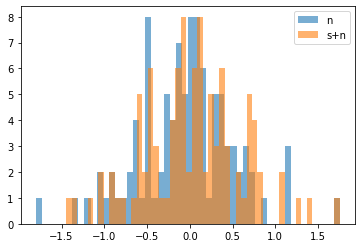

In [15]:
plt.hist(results_n_25, bins=50, alpha=0.6, label="n")
plt.hist(results_s_25, bins=50, alpha=0.6, label = "s+n")
plt.legend()
plt.show()
plt.close()

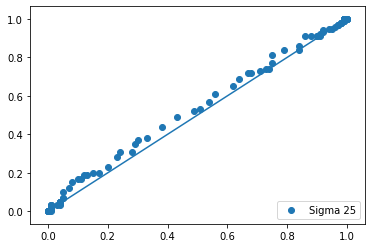

In [14]:
FP_25 = []
TP_25 = []

for t in np.linspace(-2,2,100):
    FP_25 = np.append(FP_25,len(np.where(results_n_25 >= t)[0])/len(results_n_25))
    TP_25 = np.append(TP_25,len(np.where(results_s_25 >= t)[0])/len(results_s_25))

plt.scatter(FP_25,TP_25,label="Sigma 25")
plt.legend(loc="lower right")
plt.plot([0,1])
plt.show()
plt.close()

In [88]:
def find_parameter(inFile,outFile,tbank,t,mode):
    prober(inputFile=inFile, outputFile=outFile, template=tbank, mod=mode)
    data = np.loadtxt(os.path.join(data_dir, outFile))
    
    if mode == 2:
        best = np.where(data[:,2] == np.min(data[:,2]))
        print("Minimum value is at f = {0:.3f}Hz".format(data[:,0][best][0]))
        print("Minimum value is at phi = {0:.3f}".format(data[:,1][best][0]))
        print("Minimum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
    else:
        best = np.where(data[:,2] == np.max(data[:,2]))
        s = data[:,2]
        s_best = data[:,2][best][0]
        if s_best >= t:
            print("Signal is detected")
            print("Signal is present at f = {0:.3f}Hz".format(data[:,0][best][0]))
            print("Signal is present at p = {0:.3f}".format(data[:,1][best][0]))
            print("Maximum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
            #print("The value of S is >= the threshold",len(np.where(s >= t)[0]),"times.")
            #print(data[np.where(s >= t)[0]][:,2])
            print("\n")
            result = "positive"
        elif s_best < t:
            print("Signal is not detected")
            print("Maximum is at f = {0:.3f}Hz".format(data[:,0][best][0]))
            print("Maximum is at p = {0:.3f}".format(data[:,1][best][0]))
            print("Maximum Value       = {0:.3f} ({0:.8f})".format(data[:,2][best][0]))
            print("\n")
            result = "negative"
            
    return result, s_best

In [89]:
s_list_signal = []
s_all_signal = []

number_of_files = 0

nfrq = 5000
nphi = 500
frq = np.linspace(0.01, 1000.0, nfrq)
phi = np.linspace(0, 2*np.pi, nphi)

with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq[i], phi[j]))

for i in range(50):
    generate_source(f"data_signal_{i}.csv", sigma=10, A=2, N=1000, r=1)
    time.sleep(1)
    result, s_value = find_parameter(inFile=f"data_signal_{i}.csv", outFile=f"result_signal_{i}.csv", tbank=f"temp_bank_{nfrq}_{nphi}.csv", mode=1, t=0.9)
    if result == "positive":
        s_list_signal = np.append(s_list_signal,s_value)
        number_of_files = number_of_files + 1
    s_all_signal = np.append(s_all_signal,s_value)

print(s_list_signal)
print("Number of files where a signal is present:",number_of_files)

The process has an output: 975.747507
6.130787

Signal is detected
Signal is present at f = 975.795Hz
Signal is present at p = 6.031
Maximum Value       = 1.089 (1.08928000)


The process has an output: 142.999348
0.897953

Signal is detected
Signal is present at f = 856.973Hz
Signal is present at p = 2.430
Maximum Value       = 1.321 (1.32078000)


The process has an output: 435.859922
2.738234

Signal is detected
Signal is present at f = 564.117Hz
Signal is present at p = 0.390
Maximum Value       = 1.288 (1.28838000)


The process has an output: 87.207142
0.547365

Signal is detected
Signal is present at f = 912.783Hz
Signal is present at p = 2.493
Maximum Value       = 1.075 (1.07512000)


The process has an output: 525.555257
3.301863

Signal is detected
Signal is present at f = 525.510Hz
Signal is present at p = 3.249
Maximum Value       = 1.132 (1.13219000)


The process has an output: 253.922184
1.594971

Signal is detected
Signal is present at f = 254.058Hz
Signal is present a

Signal is detected
Signal is present at f = 406.887Hz
Signal is present at p = 5.616
Maximum Value       = 1.238 (1.23848000)


The process has an output: 327.771540
2.059027

Signal is detected
Signal is present at f = 672.138Hz
Signal is present at p = 1.347
Maximum Value       = 1.418 (1.41781000)


The process has an output: 264.035366
1.658521

Signal is not detected
Maximum is at f = 844.170Hz
Maximum is at p = 4.193
Maximum Value       = 0.783 (0.78258500)


[1.08928  1.32078  1.28838  1.07512  1.13219  1.2222   0.920248 1.02523
 0.966145 1.17708  1.19166  1.19042  0.98009  1.07434  0.976154 1.06333
 0.932362 1.03308  1.09307  1.29257  1.2026   1.12159  0.962315 1.24892
 1.08617  1.09563  1.10681  1.31223  0.935904 0.959174 1.37101  0.968494
 0.919902 1.11689  0.983327 1.13412  1.35653  0.959548 1.1619   1.23848
 1.41781 ]
Number of files where a signal is present: 41


In [91]:
s_list_noise = []
s_all_noise = []

numebr_of_files = 0

nfrq = 5000
nphi = 500
frq = np.linspace(0.01, 1000.0, nfrq)
phi = np.linspace(0, 2*np.pi, nphi)

with open(f"{data_dir}/temp_bank_{nfrq}_{nphi}.csv", "w") as file:
    for i in range(nfrq):
        for j in range(nphi):
            file.write("{0} {1}\n".format(frq[i], phi[j]))

for i in range(50):
    generate_source(f"data_noise_{i}.csv", sigma=10, A=0, N=1000)
    #time.sleep(1)
    result, s_value = find_parameter(inFile=f"data_noise_{i}.csv", outFile=f"result_noise_{i}.csv", tbank=f"temp_bank_{nfrq}_{nphi}.csv", mode=1, t=0.9)
    if result == "positive":
        s_list_noise = np.append(s_list_noise,s_value)
        number_of_files = number_of_files + 1
    s_all_noise = np.append(s_all_noise,s_value)

print(s_list_noise)
print("Number of files where a signal is present:",number_of_files)

Signal is detected
Signal is present at f = 569.718Hz
Signal is present at p = 5.490
Maximum Value       = 0.907 (0.90749600)


Signal is detected
Signal is present at f = 790.560Hz
Signal is present at p = 6.157
Maximum Value       = 0.946 (0.94611800)


Signal is not detected
Maximum is at f = 651.734Hz
Maximum is at p = 0.428
Maximum Value       = 0.845 (0.84541600)


Signal is detected
Signal is present at f = 299.267Hz
Signal is present at p = 3.790
Maximum Value       = 0.902 (0.90232600)


Signal is not detected
Maximum is at f = 819.766Hz
Maximum is at p = 2.279
Maximum Value       = 0.813 (0.81344900)


Signal is not detected
Maximum is at f = 839.770Hz
Maximum is at p = 4.117
Maximum Value       = 0.864 (0.86415300)


Signal is not detected
Maximum is at f = 467.699Hz
Maximum is at p = 3.324
Maximum Value       = 0.785 (0.78483900)


Signal is detected
Signal is present at f = 486.702Hz
Signal is present at p = 0.050
Maximum Value       = 0.938 (0.93795200)


Signal is not de

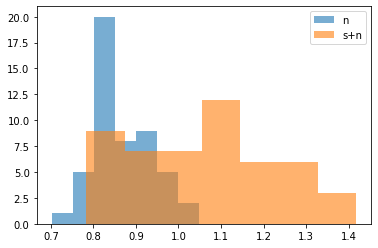

In [102]:
plt.hist(s_all_noise, bins="auto", alpha=0.6, label="n")
plt.hist(s_all_signal, bins="auto", alpha=0.6, label = "s+n")
plt.legend()
plt.show()
plt.close()

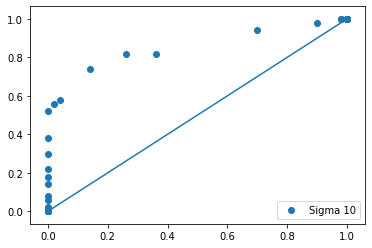

In [101]:
FP_10_rand = []
TP_10_rand = []
#t = 0.9


for t in np.linspace(-2,2,100):
    FP_10_rand = np.append(FP_10_rand,len(np.where(s_all_noise >= t)[0])/len(s_all_noise))
    TP_10_rand = np.append(TP_10_rand,len(np.where(s_all_signal >= t)[0])/len(s_all_signal))



#FP_10_rand = np.append(FP_10_rand,len(np.where(s_all_noise >= t)[0])/len(s_all_noise))
#TP_10_rand = np.append(TP_10_rand,len(np.where(s_all_signal >= t)[0])/len(s_all_signal))

    
plt.scatter(FP_10_rand,TP_10_rand,label="Sigma 10")
plt.legend(loc="lower right")
plt.plot([0,1])
plt.show()
plt.close()